In [74]:
import gym
import numpy as np
import matplotlib.pyplot as plt

### In activation_function's and neural_network's "forward" functions, there is a parameter called 'required'. These functions are called for the calculation of the current state's Q values. But also, they are called for calculating the next Q values with next observation given to the function. We use the observation in the class to calculate the current state's gradient, and we don't want to update it when the next observation's value comes to the function. So, to check whether the function is called for calculating the current or next Q values, this parameter is used. If it is true, it is called to calculate the current Q values and we update the observation in the class. If it is false, it is called to calculate the next Q values and we don't update the observation in the class.

In [75]:
class activation_function: # sigmoid is used as the activation function
    def __init__(self):
        self.x = None
    
    def forward(self, x, require = False):
        if require:
            self.x = x # if forward, update output
        return 1/(1 + np.exp(-x)) # sigmoid
#         return (max(0, x[0]), max(0, x[1]))
    
    def backward(self):
        return np.exp(-self.x) * ((1 + np.exp(-self.x))**(-2)) # gradient of sigmoid
#         return np.zeros(2) if np.array_equal(np.zeros(2), self.x) else np.ones(2)

In [76]:
class neural_network: # one layer nn
    def __init__(self, n):
        self.A = np.random.rand(4,2) # weights
        self.b = np.zeros(2) # bias
        self.grad_A = None # gradient of weight
        self.grad_b = None # gradient of bias
        self.observation = None # observation from the environment, stored for gradient calculation
        self.n = n # learning rate
        self.activation = activation_function() # use the sigmoid activation function
        self.momentum = {'A': np.zeros((4,2)), 
                         'b': np.zeros(2)} # momentum for sgd
        self.beta = 0.99 # beta for sgd
        
    def forward(self, observation, require_grad = False):
        if require_grad:
            self.observation =  observation # if forward, update
        return self.activation.forward(np.matmul(observation, self.A) + self.b, require_grad)
        
    def backward(self, grad, action):
        activation_grad = self.activation.backward()[action] # get the activation gradient
        self.grad_A = self.observation * grad * activation_grad # update weights' gradient
        self.grad_b = 1 * grad * activation_grad # update bias' gradient
    
    def update_with_sgd(self, action):
        self.momentum['A'][:, action] = self.beta * self.momentum['A'][:, action] + self.n * self.grad_A # calculate next momentum of A[action]
        self.momentum['b'][action] = self.beta * self.momentum['b'][action] + self.n * self.grad_b # calculate next momentum of b[action]
        
        self.A[:, action] = self.A[:, action] - self.momentum['A'][:, action] # update A[action]
        self.b[action] = self.b[action] - self.momentum['b'][action] # update b[action]
#         self.A[:, action] = self.A[:, action] - self.n * self.grad_A # update A[action]
#         self.b[action] = self.b[action] - self.n * self.grad_b # update b[action]

        self.A = np.maximum(-1e-3, np.minimum(1e-3, self.A)) # limit weight
        self.b = np.maximum(-1e-3, np.minimum(1e-3, self.b)) # limit bias

In [77]:
class loss_function: # L = 1/2 * (r_t + γ * max_a'(Q(s_t+1, a')) - out[a]) ^ 2
    def __init__(self):
        self.grad = None
        
    def forward(self, td):
        self.grad = -td # update the gradient
        return (td**2)/2 # return loss
        
    def backward(self):
        return self.grad # return grad of the loss

In [78]:
def angle_normalizer(observation):
    observation[2] = observation[2] % (2*np.pi) - np.pi # normalize between -pi and pi
    observation[2] /= np.pi # normalize between -1 and 1
    return observation

## TO RESTART, RUN THE CELLS BELOW
### FIRST CELL RESETS THE NN MODEL, LOSS FUNCTION, HYPER PARAMETERS AND GYM

In [79]:
rewards = []
gamma = 0.999 #0.99 # discount factor
alpha = 0.00005 #0.001 # learning rate
epsilon = 1 #0.99 # for exploration

model = neural_network(alpha) # initialize nn with alpha
loss = loss_function()

env = gym.make("CartPole-v1") # initialize gym

Episode:  0  Best Reward:  30  Episodic Reward:  30
Episode:  1  Best Reward:  30  Episodic Reward:  17
Episode:  2  Best Reward:  30  Episodic Reward:  14
Episode:  3  Best Reward:  30  Episodic Reward:  15
Episode:  4  Best Reward:  30  Episodic Reward:  27
Episode:  5  Best Reward:  30  Episodic Reward:  12
Episode:  6  Best Reward:  51  Episodic Reward:  51
Episode:  7  Best Reward:  51  Episodic Reward:  18
Episode:  8  Best Reward:  51  Episodic Reward:  9
Episode:  9  Best Reward:  51  Episodic Reward:  46
Episode:  10  Best Reward:  51  Episodic Reward:  13
Episode:  11  Best Reward:  51  Episodic Reward:  10
Episode:  12  Best Reward:  51  Episodic Reward:  22
Episode:  13  Best Reward:  51  Episodic Reward:  14
Episode:  14  Best Reward:  51  Episodic Reward:  25
Episode:  15  Best Reward:  51  Episodic Reward:  32
Episode:  16  Best Reward:  60  Episodic Reward:  60
Episode:  17  Best Reward:  60  Episodic Reward:  19
Episode:  18  Best Reward:  60  Episodic Reward:  18
Epis

Episode:  173  Best Reward:  60  Episodic Reward:  25
Episode:  174  Best Reward:  60  Episodic Reward:  15
Episode:  175  Best Reward:  60  Episodic Reward:  34
Episode:  176  Best Reward:  60  Episodic Reward:  18
Episode:  177  Best Reward:  60  Episodic Reward:  10
Episode:  178  Best Reward:  60  Episodic Reward:  12
Episode:  179  Best Reward:  60  Episodic Reward:  14
Episode:  180  Best Reward:  60  Episodic Reward:  12
Episode:  181  Best Reward:  60  Episodic Reward:  15
Episode:  182  Best Reward:  60  Episodic Reward:  12
Episode:  183  Best Reward:  60  Episodic Reward:  12
Episode:  184  Best Reward:  60  Episodic Reward:  13
Episode:  185  Best Reward:  60  Episodic Reward:  19
Episode:  186  Best Reward:  60  Episodic Reward:  33
Episode:  187  Best Reward:  60  Episodic Reward:  19
Episode:  188  Best Reward:  60  Episodic Reward:  33
Episode:  189  Best Reward:  60  Episodic Reward:  14
Episode:  190  Best Reward:  60  Episodic Reward:  58
Episode:  191  Best Reward: 

Episode:  366  Best Reward:  63  Episodic Reward:  12
Episode:  367  Best Reward:  63  Episodic Reward:  13
Episode:  368  Best Reward:  63  Episodic Reward:  12
Episode:  369  Best Reward:  63  Episodic Reward:  9
Episode:  370  Best Reward:  63  Episodic Reward:  15
Episode:  371  Best Reward:  63  Episodic Reward:  12
Episode:  372  Best Reward:  63  Episodic Reward:  12
Episode:  373  Best Reward:  63  Episodic Reward:  15
Episode:  374  Best Reward:  63  Episodic Reward:  19
Episode:  375  Best Reward:  63  Episodic Reward:  20
Episode:  376  Best Reward:  63  Episodic Reward:  16
Episode:  377  Best Reward:  63  Episodic Reward:  17
Episode:  378  Best Reward:  63  Episodic Reward:  12
Episode:  379  Best Reward:  63  Episodic Reward:  23
Episode:  380  Best Reward:  63  Episodic Reward:  13
Episode:  381  Best Reward:  63  Episodic Reward:  12
Episode:  382  Best Reward:  63  Episodic Reward:  20
Episode:  383  Best Reward:  63  Episodic Reward:  32
Episode:  384  Best Reward:  

Episode:  572  Best Reward:  63  Episodic Reward:  11
Episode:  573  Best Reward:  63  Episodic Reward:  8
Episode:  574  Best Reward:  63  Episodic Reward:  12
Episode:  575  Best Reward:  63  Episodic Reward:  13
Episode:  576  Best Reward:  63  Episodic Reward:  17
Episode:  577  Best Reward:  63  Episodic Reward:  9
Episode:  578  Best Reward:  63  Episodic Reward:  10
Episode:  579  Best Reward:  63  Episodic Reward:  15
Episode:  580  Best Reward:  63  Episodic Reward:  11
Episode:  581  Best Reward:  63  Episodic Reward:  15
Episode:  582  Best Reward:  63  Episodic Reward:  24
Episode:  583  Best Reward:  63  Episodic Reward:  12
Episode:  584  Best Reward:  63  Episodic Reward:  23
Episode:  585  Best Reward:  63  Episodic Reward:  17
Episode:  586  Best Reward:  63  Episodic Reward:  16
Episode:  587  Best Reward:  63  Episodic Reward:  20
Episode:  588  Best Reward:  63  Episodic Reward:  17
Episode:  589  Best Reward:  63  Episodic Reward:  10
Episode:  590  Best Reward:  6

Episode:  799  Best Reward:  63  Episodic Reward:  14
Episode:  800  Best Reward:  63  Episodic Reward:  12
Episode:  801  Best Reward:  63  Episodic Reward:  12
Episode:  802  Best Reward:  63  Episodic Reward:  20
Episode:  803  Best Reward:  63  Episodic Reward:  14
Episode:  804  Best Reward:  63  Episodic Reward:  12
Episode:  805  Best Reward:  63  Episodic Reward:  11
Episode:  806  Best Reward:  63  Episodic Reward:  11
Episode:  807  Best Reward:  63  Episodic Reward:  12
Episode:  808  Best Reward:  63  Episodic Reward:  13
Episode:  809  Best Reward:  63  Episodic Reward:  12
Episode:  810  Best Reward:  63  Episodic Reward:  11
Episode:  811  Best Reward:  63  Episodic Reward:  10
Episode:  812  Best Reward:  63  Episodic Reward:  12
Episode:  813  Best Reward:  63  Episodic Reward:  19
Episode:  814  Best Reward:  63  Episodic Reward:  20
Episode:  815  Best Reward:  63  Episodic Reward:  11
Episode:  816  Best Reward:  63  Episodic Reward:  13
Episode:  817  Best Reward: 

Episode:  1030  Best Reward:  63  Episodic Reward:  22
Episode:  1031  Best Reward:  63  Episodic Reward:  10
Episode:  1032  Best Reward:  63  Episodic Reward:  21
Episode:  1033  Best Reward:  63  Episodic Reward:  15
Episode:  1034  Best Reward:  63  Episodic Reward:  9
Episode:  1035  Best Reward:  63  Episodic Reward:  13
Episode:  1036  Best Reward:  63  Episodic Reward:  11
Episode:  1037  Best Reward:  63  Episodic Reward:  10
Episode:  1038  Best Reward:  63  Episodic Reward:  20
Episode:  1039  Best Reward:  63  Episodic Reward:  25
Episode:  1040  Best Reward:  63  Episodic Reward:  11
Episode:  1041  Best Reward:  63  Episodic Reward:  10
Episode:  1042  Best Reward:  63  Episodic Reward:  9
Episode:  1043  Best Reward:  63  Episodic Reward:  8
Episode:  1044  Best Reward:  63  Episodic Reward:  10
Episode:  1045  Best Reward:  63  Episodic Reward:  12
Episode:  1046  Best Reward:  63  Episodic Reward:  19
Episode:  1047  Best Reward:  63  Episodic Reward:  14
Episode:  104

Episode:  1273  Best Reward:  63  Episodic Reward:  12
Episode:  1274  Best Reward:  63  Episodic Reward:  9
Episode:  1275  Best Reward:  63  Episodic Reward:  13
Episode:  1276  Best Reward:  63  Episodic Reward:  11
Episode:  1277  Best Reward:  63  Episodic Reward:  10
Episode:  1278  Best Reward:  63  Episodic Reward:  11
Episode:  1279  Best Reward:  63  Episodic Reward:  12
Episode:  1280  Best Reward:  63  Episodic Reward:  12
Episode:  1281  Best Reward:  63  Episodic Reward:  15
Episode:  1282  Best Reward:  63  Episodic Reward:  9
Episode:  1283  Best Reward:  63  Episodic Reward:  9
Episode:  1284  Best Reward:  63  Episodic Reward:  12
Episode:  1285  Best Reward:  63  Episodic Reward:  18
Episode:  1286  Best Reward:  63  Episodic Reward:  12
Episode:  1287  Best Reward:  63  Episodic Reward:  10
Episode:  1288  Best Reward:  63  Episodic Reward:  9
Episode:  1289  Best Reward:  63  Episodic Reward:  11
Episode:  1290  Best Reward:  63  Episodic Reward:  13
Episode:  1291

Episode:  1511  Best Reward:  63  Episodic Reward:  13
Episode:  1512  Best Reward:  63  Episodic Reward:  26
Episode:  1513  Best Reward:  63  Episodic Reward:  9
Episode:  1514  Best Reward:  63  Episodic Reward:  16
Episode:  1515  Best Reward:  63  Episodic Reward:  9
Episode:  1516  Best Reward:  63  Episodic Reward:  8
Episode:  1517  Best Reward:  63  Episodic Reward:  18
Episode:  1518  Best Reward:  63  Episodic Reward:  9
Episode:  1519  Best Reward:  63  Episodic Reward:  9
Episode:  1520  Best Reward:  63  Episodic Reward:  12
Episode:  1521  Best Reward:  63  Episodic Reward:  9
Episode:  1522  Best Reward:  63  Episodic Reward:  9
Episode:  1523  Best Reward:  63  Episodic Reward:  9
Episode:  1524  Best Reward:  63  Episodic Reward:  10
Episode:  1525  Best Reward:  63  Episodic Reward:  10
Episode:  1526  Best Reward:  63  Episodic Reward:  10
Episode:  1527  Best Reward:  63  Episodic Reward:  9
Episode:  1528  Best Reward:  63  Episodic Reward:  10
Episode:  1529  Bes

Episode:  1763  Best Reward:  63  Episodic Reward:  10
Episode:  1764  Best Reward:  63  Episodic Reward:  11
Episode:  1765  Best Reward:  63  Episodic Reward:  10
Episode:  1766  Best Reward:  63  Episodic Reward:  10
Episode:  1767  Best Reward:  63  Episodic Reward:  11
Episode:  1768  Best Reward:  63  Episodic Reward:  15
Episode:  1769  Best Reward:  63  Episodic Reward:  12
Episode:  1770  Best Reward:  63  Episodic Reward:  10
Episode:  1771  Best Reward:  63  Episodic Reward:  11
Episode:  1772  Best Reward:  63  Episodic Reward:  12
Episode:  1773  Best Reward:  63  Episodic Reward:  15
Episode:  1774  Best Reward:  63  Episodic Reward:  13
Episode:  1775  Best Reward:  63  Episodic Reward:  14
Episode:  1776  Best Reward:  63  Episodic Reward:  10
Episode:  1777  Best Reward:  63  Episodic Reward:  9
Episode:  1778  Best Reward:  63  Episodic Reward:  9
Episode:  1779  Best Reward:  63  Episodic Reward:  15
Episode:  1780  Best Reward:  63  Episodic Reward:  9
Episode:  178

Episode:  2011  Best Reward:  63  Episodic Reward:  10
Episode:  2012  Best Reward:  63  Episodic Reward:  8
Episode:  2013  Best Reward:  63  Episodic Reward:  11
Episode:  2014  Best Reward:  63  Episodic Reward:  11
Episode:  2015  Best Reward:  63  Episodic Reward:  9
Episode:  2016  Best Reward:  63  Episodic Reward:  9
Episode:  2017  Best Reward:  63  Episodic Reward:  8
Episode:  2018  Best Reward:  63  Episodic Reward:  10
Episode:  2019  Best Reward:  63  Episodic Reward:  14
Episode:  2020  Best Reward:  63  Episodic Reward:  12
Episode:  2021  Best Reward:  63  Episodic Reward:  16
Episode:  2022  Best Reward:  63  Episodic Reward:  10
Episode:  2023  Best Reward:  63  Episodic Reward:  9
Episode:  2024  Best Reward:  63  Episodic Reward:  13
Episode:  2025  Best Reward:  63  Episodic Reward:  17
Episode:  2026  Best Reward:  63  Episodic Reward:  9
Episode:  2027  Best Reward:  63  Episodic Reward:  13
Episode:  2028  Best Reward:  63  Episodic Reward:  9
Episode:  2029  B

Episode:  2283  Best Reward:  63  Episodic Reward:  12
Episode:  2284  Best Reward:  63  Episodic Reward:  10
Episode:  2285  Best Reward:  63  Episodic Reward:  11
Episode:  2286  Best Reward:  63  Episodic Reward:  12
Episode:  2287  Best Reward:  63  Episodic Reward:  9
Episode:  2288  Best Reward:  63  Episodic Reward:  10
Episode:  2289  Best Reward:  63  Episodic Reward:  9
Episode:  2290  Best Reward:  63  Episodic Reward:  11
Episode:  2291  Best Reward:  63  Episodic Reward:  12
Episode:  2292  Best Reward:  63  Episodic Reward:  10
Episode:  2293  Best Reward:  63  Episodic Reward:  9
Episode:  2294  Best Reward:  63  Episodic Reward:  9
Episode:  2295  Best Reward:  63  Episodic Reward:  11
Episode:  2296  Best Reward:  63  Episodic Reward:  9
Episode:  2297  Best Reward:  63  Episodic Reward:  9
Episode:  2298  Best Reward:  63  Episodic Reward:  11
Episode:  2299  Best Reward:  63  Episodic Reward:  11
Episode:  2300  Best Reward:  63  Episodic Reward:  9
Episode:  2301  B

Episode:  2560  Best Reward:  63  Episodic Reward:  9
Episode:  2561  Best Reward:  63  Episodic Reward:  15
Episode:  2562  Best Reward:  63  Episodic Reward:  12
Episode:  2563  Best Reward:  63  Episodic Reward:  11
Episode:  2564  Best Reward:  63  Episodic Reward:  9
Episode:  2565  Best Reward:  63  Episodic Reward:  13
Episode:  2566  Best Reward:  63  Episodic Reward:  10
Episode:  2567  Best Reward:  63  Episodic Reward:  12
Episode:  2568  Best Reward:  63  Episodic Reward:  11
Episode:  2569  Best Reward:  63  Episodic Reward:  10
Episode:  2570  Best Reward:  63  Episodic Reward:  9
Episode:  2571  Best Reward:  63  Episodic Reward:  8
Episode:  2572  Best Reward:  63  Episodic Reward:  10
Episode:  2573  Best Reward:  63  Episodic Reward:  11
Episode:  2574  Best Reward:  63  Episodic Reward:  9
Episode:  2575  Best Reward:  63  Episodic Reward:  9
Episode:  2576  Best Reward:  63  Episodic Reward:  15
Episode:  2577  Best Reward:  63  Episodic Reward:  13
Episode:  2578  

Episode:  2824  Best Reward:  63  Episodic Reward:  11
Episode:  2825  Best Reward:  63  Episodic Reward:  11
Episode:  2826  Best Reward:  63  Episodic Reward:  12
Episode:  2827  Best Reward:  63  Episodic Reward:  10
Episode:  2828  Best Reward:  63  Episodic Reward:  8
Episode:  2829  Best Reward:  63  Episodic Reward:  9
Episode:  2830  Best Reward:  63  Episodic Reward:  9
Episode:  2831  Best Reward:  63  Episodic Reward:  10
Episode:  2832  Best Reward:  63  Episodic Reward:  9
Episode:  2833  Best Reward:  63  Episodic Reward:  14
Episode:  2834  Best Reward:  63  Episodic Reward:  10
Episode:  2835  Best Reward:  63  Episodic Reward:  16
Episode:  2836  Best Reward:  63  Episodic Reward:  13
Episode:  2837  Best Reward:  63  Episodic Reward:  10
Episode:  2838  Best Reward:  63  Episodic Reward:  9
Episode:  2839  Best Reward:  63  Episodic Reward:  11
Episode:  2840  Best Reward:  63  Episodic Reward:  8
Episode:  2841  Best Reward:  63  Episodic Reward:  8
Episode:  2842  B

Episode:  3087  Best Reward:  63  Episodic Reward:  13
Episode:  3088  Best Reward:  63  Episodic Reward:  9
Episode:  3089  Best Reward:  63  Episodic Reward:  9
Episode:  3090  Best Reward:  63  Episodic Reward:  10
Episode:  3091  Best Reward:  63  Episodic Reward:  11
Episode:  3092  Best Reward:  63  Episodic Reward:  9
Episode:  3093  Best Reward:  63  Episodic Reward:  9
Episode:  3094  Best Reward:  63  Episodic Reward:  17
Episode:  3095  Best Reward:  63  Episodic Reward:  9
Episode:  3096  Best Reward:  63  Episodic Reward:  9
Episode:  3097  Best Reward:  63  Episodic Reward:  9
Episode:  3098  Best Reward:  63  Episodic Reward:  10
Episode:  3099  Best Reward:  63  Episodic Reward:  11
Episode:  3100  Best Reward:  63  Episodic Reward:  9
Episode:  3101  Best Reward:  63  Episodic Reward:  8
Episode:  3102  Best Reward:  63  Episodic Reward:  10
Episode:  3103  Best Reward:  63  Episodic Reward:  9
Episode:  3104  Best Reward:  63  Episodic Reward:  8
Episode:  3105  Best 

Episode:  3366  Best Reward:  63  Episodic Reward:  12
Episode:  3367  Best Reward:  63  Episodic Reward:  11
Episode:  3368  Best Reward:  63  Episodic Reward:  12
Episode:  3369  Best Reward:  63  Episodic Reward:  8
Episode:  3370  Best Reward:  63  Episodic Reward:  8
Episode:  3371  Best Reward:  63  Episodic Reward:  10
Episode:  3372  Best Reward:  63  Episodic Reward:  10
Episode:  3373  Best Reward:  63  Episodic Reward:  11
Episode:  3374  Best Reward:  63  Episodic Reward:  9
Episode:  3375  Best Reward:  63  Episodic Reward:  10
Episode:  3376  Best Reward:  63  Episodic Reward:  9
Episode:  3377  Best Reward:  63  Episodic Reward:  9
Episode:  3378  Best Reward:  63  Episodic Reward:  13
Episode:  3379  Best Reward:  63  Episodic Reward:  9
Episode:  3380  Best Reward:  63  Episodic Reward:  10
Episode:  3381  Best Reward:  63  Episodic Reward:  9
Episode:  3382  Best Reward:  63  Episodic Reward:  8
Episode:  3383  Best Reward:  63  Episodic Reward:  11
Episode:  3384  Be

Episode:  3648  Best Reward:  63  Episodic Reward:  8
Episode:  3649  Best Reward:  63  Episodic Reward:  9
Episode:  3650  Best Reward:  63  Episodic Reward:  9
Episode:  3651  Best Reward:  63  Episodic Reward:  9
Episode:  3652  Best Reward:  63  Episodic Reward:  8
Episode:  3653  Best Reward:  63  Episodic Reward:  9
Episode:  3654  Best Reward:  63  Episodic Reward:  9
Episode:  3655  Best Reward:  63  Episodic Reward:  9
Episode:  3656  Best Reward:  63  Episodic Reward:  9
Episode:  3657  Best Reward:  63  Episodic Reward:  9
Episode:  3658  Best Reward:  63  Episodic Reward:  13
Episode:  3659  Best Reward:  63  Episodic Reward:  12
Episode:  3660  Best Reward:  63  Episodic Reward:  12
Episode:  3661  Best Reward:  63  Episodic Reward:  9
Episode:  3662  Best Reward:  63  Episodic Reward:  13
Episode:  3663  Best Reward:  63  Episodic Reward:  10
Episode:  3664  Best Reward:  63  Episodic Reward:  9
Episode:  3665  Best Reward:  63  Episodic Reward:  8
Episode:  3666  Best Re

Episode:  3932  Best Reward:  63  Episodic Reward:  10
Episode:  3933  Best Reward:  63  Episodic Reward:  9
Episode:  3934  Best Reward:  63  Episodic Reward:  9
Episode:  3935  Best Reward:  63  Episodic Reward:  9
Episode:  3936  Best Reward:  63  Episodic Reward:  9
Episode:  3937  Best Reward:  63  Episodic Reward:  8
Episode:  3938  Best Reward:  63  Episodic Reward:  10
Episode:  3939  Best Reward:  63  Episodic Reward:  8
Episode:  3940  Best Reward:  63  Episodic Reward:  9
Episode:  3941  Best Reward:  63  Episodic Reward:  9
Episode:  3942  Best Reward:  63  Episodic Reward:  12
Episode:  3943  Best Reward:  63  Episodic Reward:  9
Episode:  3944  Best Reward:  63  Episodic Reward:  9
Episode:  3945  Best Reward:  63  Episodic Reward:  11
Episode:  3946  Best Reward:  63  Episodic Reward:  9
Episode:  3947  Best Reward:  63  Episodic Reward:  9
Episode:  3948  Best Reward:  63  Episodic Reward:  11
Episode:  3949  Best Reward:  63  Episodic Reward:  9
Episode:  3950  Best Re

Episode:  4216  Best Reward:  63  Episodic Reward:  10
Episode:  4217  Best Reward:  63  Episodic Reward:  11
Episode:  4218  Best Reward:  63  Episodic Reward:  8
Episode:  4219  Best Reward:  63  Episodic Reward:  9
Episode:  4220  Best Reward:  63  Episodic Reward:  10
Episode:  4221  Best Reward:  63  Episodic Reward:  14
Episode:  4222  Best Reward:  63  Episodic Reward:  13
Episode:  4223  Best Reward:  63  Episodic Reward:  9
Episode:  4224  Best Reward:  63  Episodic Reward:  9
Episode:  4225  Best Reward:  63  Episodic Reward:  9
Episode:  4226  Best Reward:  63  Episodic Reward:  9
Episode:  4227  Best Reward:  63  Episodic Reward:  13
Episode:  4228  Best Reward:  63  Episodic Reward:  9
Episode:  4229  Best Reward:  63  Episodic Reward:  10
Episode:  4230  Best Reward:  63  Episodic Reward:  8
Episode:  4231  Best Reward:  63  Episodic Reward:  9
Episode:  4232  Best Reward:  63  Episodic Reward:  9
Episode:  4233  Best Reward:  63  Episodic Reward:  9
Episode:  4234  Best 

Episode:  4497  Best Reward:  63  Episodic Reward:  10
Episode:  4498  Best Reward:  63  Episodic Reward:  9
Episode:  4499  Best Reward:  63  Episodic Reward:  10
Episode:  4500  Best Reward:  63  Episodic Reward:  10
Episode:  4501  Best Reward:  63  Episodic Reward:  10
Episode:  4502  Best Reward:  63  Episodic Reward:  8
Episode:  4503  Best Reward:  63  Episodic Reward:  10
Episode:  4504  Best Reward:  63  Episodic Reward:  9
Episode:  4505  Best Reward:  63  Episodic Reward:  8
Episode:  4506  Best Reward:  63  Episodic Reward:  9
Episode:  4507  Best Reward:  63  Episodic Reward:  9
Episode:  4508  Best Reward:  63  Episodic Reward:  11
Episode:  4509  Best Reward:  63  Episodic Reward:  9
Episode:  4510  Best Reward:  63  Episodic Reward:  9
Episode:  4511  Best Reward:  63  Episodic Reward:  10
Episode:  4512  Best Reward:  63  Episodic Reward:  8
Episode:  4513  Best Reward:  63  Episodic Reward:  10
Episode:  4514  Best Reward:  63  Episodic Reward:  11
Episode:  4515  Bes

Episode:  4783  Best Reward:  63  Episodic Reward:  8
Episode:  4784  Best Reward:  63  Episodic Reward:  9
Episode:  4785  Best Reward:  63  Episodic Reward:  11
Episode:  4786  Best Reward:  63  Episodic Reward:  8
Episode:  4787  Best Reward:  63  Episodic Reward:  9
Episode:  4788  Best Reward:  63  Episodic Reward:  9
Episode:  4789  Best Reward:  63  Episodic Reward:  9
Episode:  4790  Best Reward:  63  Episodic Reward:  9
Episode:  4791  Best Reward:  63  Episodic Reward:  9
Episode:  4792  Best Reward:  63  Episodic Reward:  10
Episode:  4793  Best Reward:  63  Episodic Reward:  10
Episode:  4794  Best Reward:  63  Episodic Reward:  8
Episode:  4795  Best Reward:  63  Episodic Reward:  9
Episode:  4796  Best Reward:  63  Episodic Reward:  9
Episode:  4797  Best Reward:  63  Episodic Reward:  9
Episode:  4798  Best Reward:  63  Episodic Reward:  9
Episode:  4799  Best Reward:  63  Episodic Reward:  11
Episode:  4800  Best Reward:  63  Episodic Reward:  9
Episode:  4801  Best Rew

Episode:  5079  Best Reward:  63  Episodic Reward:  9
Episode:  5080  Best Reward:  63  Episodic Reward:  9
Episode:  5081  Best Reward:  63  Episodic Reward:  9
Episode:  5082  Best Reward:  63  Episodic Reward:  10
Episode:  5083  Best Reward:  63  Episodic Reward:  9
Episode:  5084  Best Reward:  63  Episodic Reward:  11
Episode:  5085  Best Reward:  63  Episodic Reward:  9
Episode:  5086  Best Reward:  63  Episodic Reward:  9
Episode:  5087  Best Reward:  63  Episodic Reward:  9
Episode:  5088  Best Reward:  63  Episodic Reward:  9
Episode:  5089  Best Reward:  63  Episodic Reward:  9
Episode:  5090  Best Reward:  63  Episodic Reward:  9
Episode:  5091  Best Reward:  63  Episodic Reward:  9
Episode:  5092  Best Reward:  63  Episodic Reward:  9
Episode:  5093  Best Reward:  63  Episodic Reward:  10
Episode:  5094  Best Reward:  63  Episodic Reward:  8
Episode:  5095  Best Reward:  63  Episodic Reward:  8
Episode:  5096  Best Reward:  63  Episodic Reward:  9
Episode:  5097  Best Rewa

Episode:  5368  Best Reward:  63  Episodic Reward:  9
Episode:  5369  Best Reward:  63  Episodic Reward:  8
Episode:  5370  Best Reward:  63  Episodic Reward:  11
Episode:  5371  Best Reward:  63  Episodic Reward:  8
Episode:  5372  Best Reward:  63  Episodic Reward:  8
Episode:  5373  Best Reward:  63  Episodic Reward:  9
Episode:  5374  Best Reward:  63  Episodic Reward:  8
Episode:  5375  Best Reward:  63  Episodic Reward:  9
Episode:  5376  Best Reward:  63  Episodic Reward:  9
Episode:  5377  Best Reward:  63  Episodic Reward:  8
Episode:  5378  Best Reward:  63  Episodic Reward:  9
Episode:  5379  Best Reward:  63  Episodic Reward:  9
Episode:  5380  Best Reward:  63  Episodic Reward:  9
Episode:  5381  Best Reward:  63  Episodic Reward:  11
Episode:  5382  Best Reward:  63  Episodic Reward:  9
Episode:  5383  Best Reward:  63  Episodic Reward:  9
Episode:  5384  Best Reward:  63  Episodic Reward:  10
Episode:  5385  Best Reward:  63  Episodic Reward:  10
Episode:  5386  Best Rew

Episode:  5523  Best Reward:  63  Episodic Reward:  9
Episode:  5524  Best Reward:  63  Episodic Reward:  9
Episode:  5525  Best Reward:  63  Episodic Reward:  8
Episode:  5526  Best Reward:  63  Episodic Reward:  9
Episode:  5527  Best Reward:  63  Episodic Reward:  8
Episode:  5528  Best Reward:  63  Episodic Reward:  9
Episode:  5529  Best Reward:  63  Episodic Reward:  9
Episode:  5530  Best Reward:  63  Episodic Reward:  9
Episode:  5531  Best Reward:  63  Episodic Reward:  9
Episode:  5532  Best Reward:  63  Episodic Reward:  10
Episode:  5533  Best Reward:  63  Episodic Reward:  8
Episode:  5534  Best Reward:  63  Episodic Reward:  9
Episode:  5535  Best Reward:  63  Episodic Reward:  10
Episode:  5536  Best Reward:  63  Episodic Reward:  9
Episode:  5537  Best Reward:  63  Episodic Reward:  8
Episode:  5538  Best Reward:  63  Episodic Reward:  8
Episode:  5539  Best Reward:  63  Episodic Reward:  9
Episode:  5540  Best Reward:  63  Episodic Reward:  9
Episode:  5541  Best Rewar

Episode:  5821  Best Reward:  63  Episodic Reward:  9
Episode:  5822  Best Reward:  63  Episodic Reward:  8
Episode:  5823  Best Reward:  63  Episodic Reward:  9
Episode:  5824  Best Reward:  63  Episodic Reward:  9
Episode:  5825  Best Reward:  63  Episodic Reward:  8
Episode:  5826  Best Reward:  63  Episodic Reward:  10
Episode:  5827  Best Reward:  63  Episodic Reward:  9
Episode:  5828  Best Reward:  63  Episodic Reward:  9
Episode:  5829  Best Reward:  63  Episodic Reward:  10
Episode:  5830  Best Reward:  63  Episodic Reward:  9
Episode:  5831  Best Reward:  63  Episodic Reward:  9
Episode:  5832  Best Reward:  63  Episodic Reward:  10
Episode:  5833  Best Reward:  63  Episodic Reward:  9
Episode:  5834  Best Reward:  63  Episodic Reward:  11
Episode:  5835  Best Reward:  63  Episodic Reward:  9
Episode:  5836  Best Reward:  63  Episodic Reward:  9
Episode:  5837  Best Reward:  63  Episodic Reward:  9
Episode:  5838  Best Reward:  63  Episodic Reward:  9
Episode:  5839  Best Rew

Episode:  5975  Best Reward:  63  Episodic Reward:  10
Episode:  5976  Best Reward:  63  Episodic Reward:  9
Episode:  5977  Best Reward:  63  Episodic Reward:  9
Episode:  5978  Best Reward:  63  Episodic Reward:  9
Episode:  5979  Best Reward:  63  Episodic Reward:  9
Episode:  5980  Best Reward:  63  Episodic Reward:  9
Episode:  5981  Best Reward:  63  Episodic Reward:  9
Episode:  5982  Best Reward:  63  Episodic Reward:  9
Episode:  5983  Best Reward:  63  Episodic Reward:  9
Episode:  5984  Best Reward:  63  Episodic Reward:  9
Episode:  5985  Best Reward:  63  Episodic Reward:  9
Episode:  5986  Best Reward:  63  Episodic Reward:  8
Episode:  5987  Best Reward:  63  Episodic Reward:  8
Episode:  5988  Best Reward:  63  Episodic Reward:  11
Episode:  5989  Best Reward:  63  Episodic Reward:  9
Episode:  5990  Best Reward:  63  Episodic Reward:  8
Episode:  5991  Best Reward:  63  Episodic Reward:  10
Episode:  5992  Best Reward:  63  Episodic Reward:  9
Episode:  5993  Best Rewa

Episode:  6241  Best Reward:  63  Episodic Reward:  9
Episode:  6242  Best Reward:  63  Episodic Reward:  9
Episode:  6243  Best Reward:  63  Episodic Reward:  12
Episode:  6244  Best Reward:  63  Episodic Reward:  8
Episode:  6245  Best Reward:  63  Episodic Reward:  9
Episode:  6246  Best Reward:  63  Episodic Reward:  9
Episode:  6247  Best Reward:  63  Episodic Reward:  9
Episode:  6248  Best Reward:  63  Episodic Reward:  10
Episode:  6249  Best Reward:  63  Episodic Reward:  9
Episode:  6250  Best Reward:  63  Episodic Reward:  9
Episode:  6251  Best Reward:  63  Episodic Reward:  9
Episode:  6252  Best Reward:  63  Episodic Reward:  9
Episode:  6253  Best Reward:  63  Episodic Reward:  9
Episode:  6254  Best Reward:  63  Episodic Reward:  9
Episode:  6255  Best Reward:  63  Episodic Reward:  9
Episode:  6256  Best Reward:  63  Episodic Reward:  9
Episode:  6257  Best Reward:  63  Episodic Reward:  8
Episode:  6258  Best Reward:  63  Episodic Reward:  9
Episode:  6259  Best Rewar

Episode:  6532  Best Reward:  63  Episodic Reward:  8
Episode:  6533  Best Reward:  63  Episodic Reward:  9
Episode:  6534  Best Reward:  63  Episodic Reward:  8
Episode:  6535  Best Reward:  63  Episodic Reward:  9
Episode:  6536  Best Reward:  63  Episodic Reward:  9
Episode:  6537  Best Reward:  63  Episodic Reward:  8
Episode:  6538  Best Reward:  63  Episodic Reward:  8
Episode:  6539  Best Reward:  63  Episodic Reward:  12
Episode:  6540  Best Reward:  63  Episodic Reward:  9
Episode:  6541  Best Reward:  63  Episodic Reward:  9
Episode:  6542  Best Reward:  63  Episodic Reward:  9
Episode:  6543  Best Reward:  63  Episodic Reward:  9
Episode:  6544  Best Reward:  63  Episodic Reward:  9
Episode:  6545  Best Reward:  63  Episodic Reward:  8
Episode:  6546  Best Reward:  63  Episodic Reward:  8
Episode:  6547  Best Reward:  63  Episodic Reward:  9
Episode:  6548  Best Reward:  63  Episodic Reward:  9
Episode:  6549  Best Reward:  63  Episodic Reward:  9
Episode:  6550  Best Reward

Episode:  6830  Best Reward:  63  Episodic Reward:  9
Episode:  6831  Best Reward:  63  Episodic Reward:  9
Episode:  6832  Best Reward:  63  Episodic Reward:  9
Episode:  6833  Best Reward:  63  Episodic Reward:  9
Episode:  6834  Best Reward:  63  Episodic Reward:  8
Episode:  6835  Best Reward:  63  Episodic Reward:  9
Episode:  6836  Best Reward:  63  Episodic Reward:  9
Episode:  6837  Best Reward:  63  Episodic Reward:  9
Episode:  6838  Best Reward:  63  Episodic Reward:  9
Episode:  6839  Best Reward:  63  Episodic Reward:  10
Episode:  6840  Best Reward:  63  Episodic Reward:  9
Episode:  6841  Best Reward:  63  Episodic Reward:  8
Episode:  6842  Best Reward:  63  Episodic Reward:  9
Episode:  6843  Best Reward:  63  Episodic Reward:  8
Episode:  6844  Best Reward:  63  Episodic Reward:  10
Episode:  6845  Best Reward:  63  Episodic Reward:  9
Episode:  6846  Best Reward:  63  Episodic Reward:  9
Episode:  6847  Best Reward:  63  Episodic Reward:  8
Episode:  6848  Best Rewar

Episode:  7131  Best Reward:  63  Episodic Reward:  9
Episode:  7132  Best Reward:  63  Episodic Reward:  8
Episode:  7133  Best Reward:  63  Episodic Reward:  8
Episode:  7134  Best Reward:  63  Episodic Reward:  8
Episode:  7135  Best Reward:  63  Episodic Reward:  9
Episode:  7136  Best Reward:  63  Episodic Reward:  9
Episode:  7137  Best Reward:  63  Episodic Reward:  9
Episode:  7138  Best Reward:  63  Episodic Reward:  9
Episode:  7139  Best Reward:  63  Episodic Reward:  9
Episode:  7140  Best Reward:  63  Episodic Reward:  9
Episode:  7141  Best Reward:  63  Episodic Reward:  9
Episode:  7142  Best Reward:  63  Episodic Reward:  9
Episode:  7143  Best Reward:  63  Episodic Reward:  8
Episode:  7144  Best Reward:  63  Episodic Reward:  9
Episode:  7145  Best Reward:  63  Episodic Reward:  9
Episode:  7146  Best Reward:  63  Episodic Reward:  9
Episode:  7147  Best Reward:  63  Episodic Reward:  8
Episode:  7148  Best Reward:  63  Episodic Reward:  8
Episode:  7149  Best Reward:

Episode:  7422  Best Reward:  63  Episodic Reward:  9
Episode:  7423  Best Reward:  63  Episodic Reward:  9
Episode:  7424  Best Reward:  63  Episodic Reward:  9
Episode:  7425  Best Reward:  63  Episodic Reward:  10
Episode:  7426  Best Reward:  63  Episodic Reward:  9
Episode:  7427  Best Reward:  63  Episodic Reward:  8
Episode:  7428  Best Reward:  63  Episodic Reward:  8
Episode:  7429  Best Reward:  63  Episodic Reward:  11
Episode:  7430  Best Reward:  63  Episodic Reward:  8
Episode:  7431  Best Reward:  63  Episodic Reward:  9
Episode:  7432  Best Reward:  63  Episodic Reward:  9
Episode:  7433  Best Reward:  63  Episodic Reward:  9
Episode:  7434  Best Reward:  63  Episodic Reward:  9
Episode:  7435  Best Reward:  63  Episodic Reward:  10
Episode:  7436  Best Reward:  63  Episodic Reward:  9
Episode:  7437  Best Reward:  63  Episodic Reward:  11
Episode:  7438  Best Reward:  63  Episodic Reward:  9
Episode:  7439  Best Reward:  63  Episodic Reward:  9
Episode:  7440  Best Rew

Episode:  7722  Best Reward:  63  Episodic Reward:  9
Episode:  7723  Best Reward:  63  Episodic Reward:  9
Episode:  7724  Best Reward:  63  Episodic Reward:  9
Episode:  7725  Best Reward:  63  Episodic Reward:  9
Episode:  7726  Best Reward:  63  Episodic Reward:  9
Episode:  7727  Best Reward:  63  Episodic Reward:  9
Episode:  7728  Best Reward:  63  Episodic Reward:  9
Episode:  7729  Best Reward:  63  Episodic Reward:  8
Episode:  7730  Best Reward:  63  Episodic Reward:  8
Episode:  7731  Best Reward:  63  Episodic Reward:  9
Episode:  7732  Best Reward:  63  Episodic Reward:  9
Episode:  7733  Best Reward:  63  Episodic Reward:  8
Episode:  7734  Best Reward:  63  Episodic Reward:  9
Episode:  7735  Best Reward:  63  Episodic Reward:  11
Episode:  7736  Best Reward:  63  Episodic Reward:  9
Episode:  7737  Best Reward:  63  Episodic Reward:  9
Episode:  7738  Best Reward:  63  Episodic Reward:  9
Episode:  7739  Best Reward:  63  Episodic Reward:  9
Episode:  7740  Best Reward

Episode:  8000  Best Reward:  63  Episodic Reward:  8
Episode:  8001  Best Reward:  63  Episodic Reward:  9
Episode:  8002  Best Reward:  63  Episodic Reward:  9
Episode:  8003  Best Reward:  63  Episodic Reward:  11
Episode:  8004  Best Reward:  63  Episodic Reward:  9
Episode:  8005  Best Reward:  63  Episodic Reward:  8
Episode:  8006  Best Reward:  63  Episodic Reward:  9
Episode:  8007  Best Reward:  63  Episodic Reward:  9
Episode:  8008  Best Reward:  63  Episodic Reward:  9
Episode:  8009  Best Reward:  63  Episodic Reward:  9
Episode:  8010  Best Reward:  63  Episodic Reward:  9
Episode:  8011  Best Reward:  63  Episodic Reward:  9
Episode:  8012  Best Reward:  63  Episodic Reward:  10
Episode:  8013  Best Reward:  63  Episodic Reward:  8
Episode:  8014  Best Reward:  63  Episodic Reward:  9
Episode:  8015  Best Reward:  63  Episodic Reward:  9
Episode:  8016  Best Reward:  63  Episodic Reward:  8
Episode:  8017  Best Reward:  63  Episodic Reward:  8
Episode:  8018  Best Rewar

Episode:  8154  Best Reward:  63  Episodic Reward:  9
Episode:  8155  Best Reward:  63  Episodic Reward:  9
Episode:  8156  Best Reward:  63  Episodic Reward:  8
Episode:  8157  Best Reward:  63  Episodic Reward:  9
Episode:  8158  Best Reward:  63  Episodic Reward:  8
Episode:  8159  Best Reward:  63  Episodic Reward:  8
Episode:  8160  Best Reward:  63  Episodic Reward:  9
Episode:  8161  Best Reward:  63  Episodic Reward:  9
Episode:  8162  Best Reward:  63  Episodic Reward:  10
Episode:  8163  Best Reward:  63  Episodic Reward:  9
Episode:  8164  Best Reward:  63  Episodic Reward:  9
Episode:  8165  Best Reward:  63  Episodic Reward:  9
Episode:  8166  Best Reward:  63  Episodic Reward:  9
Episode:  8167  Best Reward:  63  Episodic Reward:  9
Episode:  8168  Best Reward:  63  Episodic Reward:  9
Episode:  8169  Best Reward:  63  Episodic Reward:  9
Episode:  8170  Best Reward:  63  Episodic Reward:  9
Episode:  8171  Best Reward:  63  Episodic Reward:  8
Episode:  8172  Best Reward

Episode:  8447  Best Reward:  63  Episodic Reward:  11
Episode:  8448  Best Reward:  63  Episodic Reward:  9
Episode:  8449  Best Reward:  63  Episodic Reward:  9
Episode:  8450  Best Reward:  63  Episodic Reward:  8
Episode:  8451  Best Reward:  63  Episodic Reward:  9
Episode:  8452  Best Reward:  63  Episodic Reward:  8
Episode:  8453  Best Reward:  63  Episodic Reward:  9
Episode:  8454  Best Reward:  63  Episodic Reward:  9
Episode:  8455  Best Reward:  63  Episodic Reward:  9
Episode:  8456  Best Reward:  63  Episodic Reward:  9
Episode:  8457  Best Reward:  63  Episodic Reward:  9
Episode:  8458  Best Reward:  63  Episodic Reward:  8
Episode:  8459  Best Reward:  63  Episodic Reward:  9
Episode:  8460  Best Reward:  63  Episodic Reward:  9
Episode:  8461  Best Reward:  63  Episodic Reward:  9
Episode:  8462  Best Reward:  63  Episodic Reward:  9
Episode:  8463  Best Reward:  63  Episodic Reward:  9
Episode:  8464  Best Reward:  63  Episodic Reward:  9
Episode:  8465  Best Reward

Episode:  8734  Best Reward:  63  Episodic Reward:  9
Episode:  8735  Best Reward:  63  Episodic Reward:  9
Episode:  8736  Best Reward:  63  Episodic Reward:  9
Episode:  8737  Best Reward:  63  Episodic Reward:  9
Episode:  8738  Best Reward:  63  Episodic Reward:  9
Episode:  8739  Best Reward:  63  Episodic Reward:  9
Episode:  8740  Best Reward:  63  Episodic Reward:  9
Episode:  8741  Best Reward:  63  Episodic Reward:  9
Episode:  8742  Best Reward:  63  Episodic Reward:  9
Episode:  8743  Best Reward:  63  Episodic Reward:  9
Episode:  8744  Best Reward:  63  Episodic Reward:  9
Episode:  8745  Best Reward:  63  Episodic Reward:  9
Episode:  8746  Best Reward:  63  Episodic Reward:  9
Episode:  8747  Best Reward:  63  Episodic Reward:  9
Episode:  8748  Best Reward:  63  Episodic Reward:  8
Episode:  8749  Best Reward:  63  Episodic Reward:  9
Episode:  8750  Best Reward:  63  Episodic Reward:  8
Episode:  8751  Best Reward:  63  Episodic Reward:  11
Episode:  8752  Best Reward

Episode:  9015  Best Reward:  63  Episodic Reward:  9
Episode:  9016  Best Reward:  63  Episodic Reward:  9
Episode:  9017  Best Reward:  63  Episodic Reward:  9
Episode:  9018  Best Reward:  63  Episodic Reward:  9
Episode:  9019  Best Reward:  63  Episodic Reward:  9
Episode:  9020  Best Reward:  63  Episodic Reward:  9
Episode:  9021  Best Reward:  63  Episodic Reward:  9
Episode:  9022  Best Reward:  63  Episodic Reward:  9
Episode:  9023  Best Reward:  63  Episodic Reward:  9
Episode:  9024  Best Reward:  63  Episodic Reward:  9
Episode:  9025  Best Reward:  63  Episodic Reward:  9
Episode:  9026  Best Reward:  63  Episodic Reward:  9
Episode:  9027  Best Reward:  63  Episodic Reward:  9
Episode:  9028  Best Reward:  63  Episodic Reward:  8
Episode:  9029  Best Reward:  63  Episodic Reward:  9
Episode:  9030  Best Reward:  63  Episodic Reward:  9
Episode:  9031  Best Reward:  63  Episodic Reward:  8
Episode:  9032  Best Reward:  63  Episodic Reward:  9
Episode:  9033  Best Reward:

Episode:  9171  Best Reward:  63  Episodic Reward:  9
Episode:  9172  Best Reward:  63  Episodic Reward:  8
Episode:  9173  Best Reward:  63  Episodic Reward:  10
Episode:  9174  Best Reward:  63  Episodic Reward:  9
Episode:  9175  Best Reward:  63  Episodic Reward:  9
Episode:  9176  Best Reward:  63  Episodic Reward:  9
Episode:  9177  Best Reward:  63  Episodic Reward:  9
Episode:  9178  Best Reward:  63  Episodic Reward:  9
Episode:  9179  Best Reward:  63  Episodic Reward:  9
Episode:  9180  Best Reward:  63  Episodic Reward:  8
Episode:  9181  Best Reward:  63  Episodic Reward:  9
Episode:  9182  Best Reward:  63  Episodic Reward:  8
Episode:  9183  Best Reward:  63  Episodic Reward:  9
Episode:  9184  Best Reward:  63  Episodic Reward:  9
Episode:  9185  Best Reward:  63  Episodic Reward:  9
Episode:  9186  Best Reward:  63  Episodic Reward:  11
Episode:  9187  Best Reward:  63  Episodic Reward:  9
Episode:  9188  Best Reward:  63  Episodic Reward:  9
Episode:  9189  Best Rewar

Episode:  9465  Best Reward:  63  Episodic Reward:  9
Episode:  9466  Best Reward:  63  Episodic Reward:  8
Episode:  9467  Best Reward:  63  Episodic Reward:  9
Episode:  9468  Best Reward:  63  Episodic Reward:  9
Episode:  9469  Best Reward:  63  Episodic Reward:  9
Episode:  9470  Best Reward:  63  Episodic Reward:  9
Episode:  9471  Best Reward:  63  Episodic Reward:  9
Episode:  9472  Best Reward:  63  Episodic Reward:  8
Episode:  9473  Best Reward:  63  Episodic Reward:  8
Episode:  9474  Best Reward:  63  Episodic Reward:  9
Episode:  9475  Best Reward:  63  Episodic Reward:  8
Episode:  9476  Best Reward:  63  Episodic Reward:  9
Episode:  9477  Best Reward:  63  Episodic Reward:  8
Episode:  9478  Best Reward:  63  Episodic Reward:  8
Episode:  9479  Best Reward:  63  Episodic Reward:  11
Episode:  9480  Best Reward:  63  Episodic Reward:  8
Episode:  9481  Best Reward:  63  Episodic Reward:  8
Episode:  9482  Best Reward:  63  Episodic Reward:  9
Episode:  9483  Best Reward

Episode:  9763  Best Reward:  63  Episodic Reward:  8
Episode:  9764  Best Reward:  63  Episodic Reward:  9
Episode:  9765  Best Reward:  63  Episodic Reward:  8
Episode:  9766  Best Reward:  63  Episodic Reward:  9
Episode:  9767  Best Reward:  63  Episodic Reward:  9
Episode:  9768  Best Reward:  63  Episodic Reward:  9
Episode:  9769  Best Reward:  63  Episodic Reward:  9
Episode:  9770  Best Reward:  63  Episodic Reward:  9
Episode:  9771  Best Reward:  63  Episodic Reward:  9
Episode:  9772  Best Reward:  63  Episodic Reward:  9
Episode:  9773  Best Reward:  63  Episodic Reward:  8
Episode:  9774  Best Reward:  63  Episodic Reward:  8
Episode:  9775  Best Reward:  63  Episodic Reward:  9
Episode:  9776  Best Reward:  63  Episodic Reward:  9
Episode:  9777  Best Reward:  63  Episodic Reward:  9
Episode:  9778  Best Reward:  63  Episodic Reward:  9
Episode:  9779  Best Reward:  63  Episodic Reward:  9
Episode:  9780  Best Reward:  63  Episodic Reward:  9
Episode:  9781  Best Reward:

Text(0, 0.5, 'Reward')

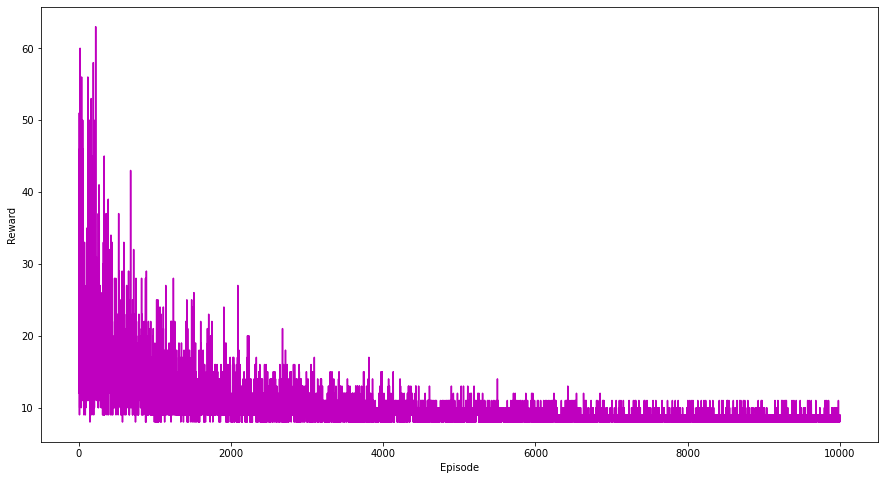

In [80]:
best_reward = -np.inf # store the best reward
reward_tracker = 0   # keep track of the goal, break the loop if 10 episodes' reward equals to 500 points consecutively

for episode in range(10000): # try for 10000 episodes
    done = False
    observation = env.reset() # reset the environment
    observation = angle_normalizer(observation) # normalize the angle of the observation
    episodic_reward = 0 # keep track of the episodic reward
    
    while not done:
        # env.render()
        q_vals = model.forward(observation, True) # get current observation's Q values

        if np.random.rand() < epsilon: # exploration
            action = env.action_space.sample()
        else: # exploitation
            action = np.argmax(q_vals) # select the greater Q values' action
        
        next_observation, reward, done, info = env.step(action) # get the environment results from the action
        
        episodic_reward += reward # update the episodic reward
        next_observation = angle_normalizer(next_observation) # normalize the angle of the observation

        next_q = max(model.forward(next_observation, False)) # get maximum Q value of the possible actions
        current_q = q_vals[action] # get current state's Q value
        
        temporal_difference = reward + (gamma * next_q) - current_q # calculate the temporal difference
        loss_val = loss.forward(temporal_difference) # calculate the loss

        #update
        loss_grad = loss.backward() # calculate the gradient of loss
        model.backward(loss_grad, action) # update the gradients of weights and bias
        model.update_with_sgd(action) # update weights and bias via sgd with momentum
        
        observation = next_observation # set the next observation as current one
    
    epsilon = max(0.01, epsilon*0.9995)
#     epsilon *= 0.99 # update the epsilon
    rewards.append(episodic_reward)

    if episodic_reward > best_reward: # check if best reward has been exceeded in this episode
        best_reward = episodic_reward

    print("Episode: ", episode, " Best Reward: ", int(best_reward), " Episodic Reward: ", int(episodic_reward))

    # check if 10 consecutive episodes has given rewards greater than 400
    reward_tracker = reward_tracker + 1 if episodic_reward >= 500 else 0
    if(reward_tracker == 5):
        print("Learnt at episode ", episode)
        break
        
plt.figure(figsize=(15, 8))
plt.plot(range(len(rewards)), rewards, 'm')
plt.xlabel("Episode")
plt.ylabel("Reward")

## TO OBSERVE THE RESULTING MODEL'S BEHAVIOR, RUN THE CODE BELOW

In [8]:
observation = env.reset()
observation = angle_normalizer(observation)
episodic_reward = 0
    
for _ in range(500):
    env.render()
                        
    q_vals = model.forward(observation, True)
    action = np.argmax(q_vals)
        
    next_observation, reward, done, info = env.step(action)
    episodic_reward += reward
        
    next_observation = angle_normalizer(next_observation)
    observation = next_observation
    
env.close()

print("Reward: ", episodic_reward)

c:\users\pelin\gym\gym\logger.py:30: UserWarning: WARN: You are calling 'step()' even though this environment has already returned done = True. You should always call 'reset()' once you receive 'done = True' -- any further steps are undefined behavior.
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


Reward:  9.0
